# Data fields
Most of the fields are self-explanatory. The following are descriptions for those that aren't.

Id - an Id that represents a (Store, Date) duple within the test set

Store - a unique Id for each store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day

Open - an indicator for whether the store was open: 0 = closed, 1 = open
    
StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
StoreType - differentiates between 4 different store models: a, b, c, d
Assortment - describes an assortment level: a = basic, b = extra, c = extended
CompetitionDistance - distance in meters to the nearest competitor store
CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
Promo - indicates whether a store is running a promo on that day
Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/adity/Downloads/archive (1)/train.csv")
data.head()

C:\Users\adity\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
print(data.shape)

(1017209, 9)


In [4]:
data1 = pd.read_csv("C:/Users/adity/Downloads/archive (1)/test.csv")
data1.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [5]:
df = pd.concat([data, data1])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058297 entries, 0 to 41087
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Store          1058297 non-null  int64  
 1   DayOfWeek      1058297 non-null  int64  
 2   Date           1058297 non-null  object 
 3   Sales          1017209 non-null  float64
 4   Customers      1017209 non-null  float64
 5   Open           1058286 non-null  float64
 6   Promo          1058297 non-null  int64  
 7   StateHoliday   1058297 non-null  object 
 8   SchoolHoliday  1058297 non-null  int64  
 9   Id             41088 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 88.8+ MB


In [7]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Id
count,1.058297e+06,1.058297e+06,1.017209e+06,1.017209e+06,1.058286e+06,1.058297e+06,1.058297e+06,41088.000000
mean,5.583315e+02,3.997596e+00,5.773819e+03,6.331459e+02,8.310466e-01,3.820704e-01,1.889290e-01,20544.500000
std,3.218456e+02,1.998099e+00,3.849926e+03,4.644117e+02,3.747109e-01,4.858939e-01,3.914524e-01,11861.228267
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,10272.750000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,20544.500000
75%,8.370000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,30816.250000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,41088.000000


In [8]:
df.isnull().sum()

Store                  0
DayOfWeek              0
Date                   0
Sales              41088
Customers          41088
Open                  11
Promo                  0
StateHoliday           0
SchoolHoliday          0
Id               1017209
dtype: int64

In [9]:
df.drop(['Id', 'Date'], axis = 1, inplace = True)

In [10]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,5263.0,555.0,1.0,1,0,1
1,2,5,6064.0,625.0,1.0,1,0,1
2,3,5,8314.0,821.0,1.0,1,0,1
3,4,5,13995.0,1498.0,1.0,1,0,1
4,5,5,4822.0,559.0,1.0,1,0,1


In [11]:
df.isnull().sum()

Store                0
DayOfWeek            0
Sales            41088
Customers        41088
Open                11
Promo                0
StateHoliday         0
SchoolHoliday        0
dtype: int64

In [12]:
df.dropna(inplace = True)

In [13]:
df.isnull().sum()

Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [14]:
print(df['StateHoliday'].unique())
print(df['SchoolHoliday'].unique())
print(df['Open'].unique())

['0' 'a' 'b' 'c' 0]
[1 0]
[1. 0.]


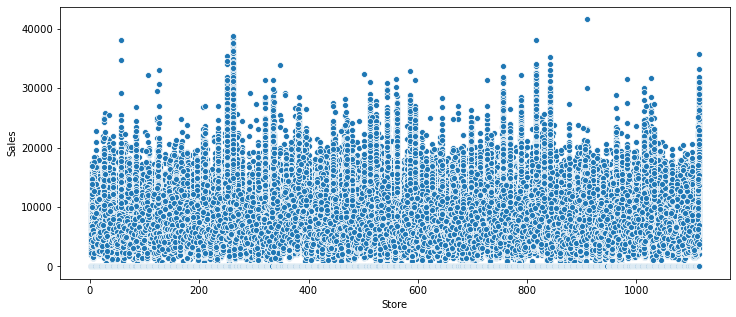

In [15]:
plt.figure(figsize = (12,5))
sns.scatterplot(data=df, x="Store", y="Sales")

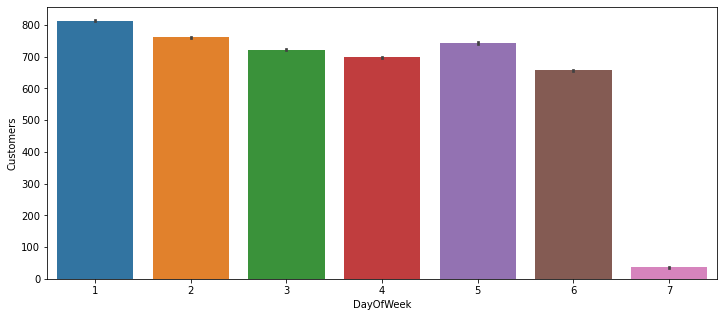

In [16]:
plt.figure(figsize = (12,5))
sns.barplot(data=df, x="DayOfWeek", y="Customers")

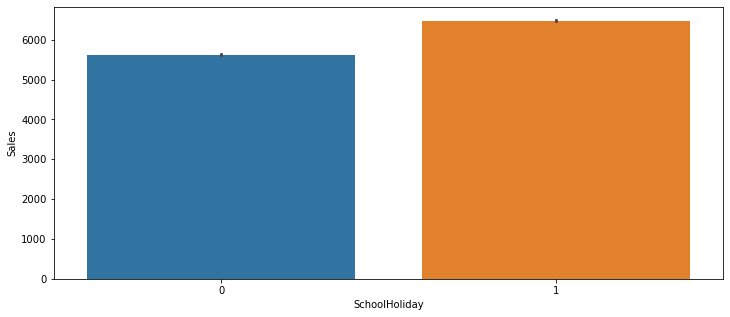

In [17]:
plt.figure(figsize = (12,5))
sns.barplot(data=df, x="SchoolHoliday", y="Sales")

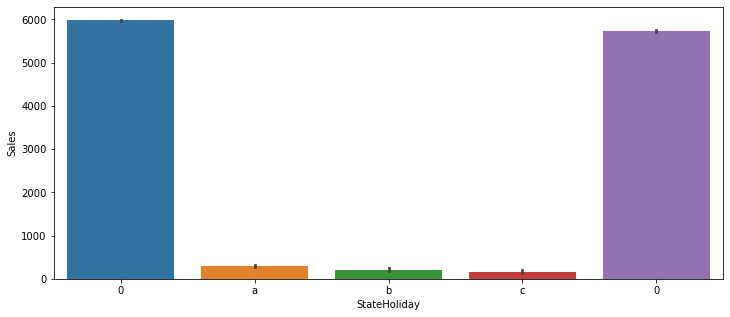

In [18]:
plt.figure(figsize = (12,5))
sns.barplot(data=df, x="StateHoliday", y="Sales")

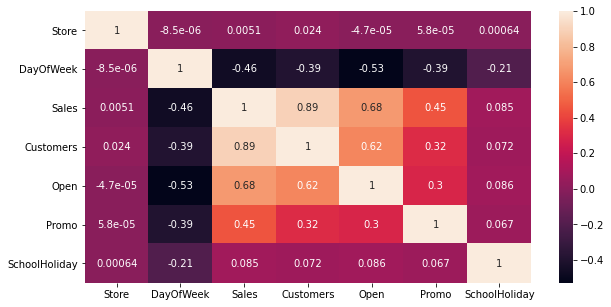

In [19]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot=True)

In [20]:
st = pd.get_dummies(df['StateHoliday'], drop_first = True)

In [24]:
df1 = pd.concat([df, st], axis = 1)
df1.drop(['StateHoliday'], axis = 1, inplace = True)

In [25]:
df1.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,0,a,b,c
0,1,5,5263.0,555.0,1.0,1,1,1,0,0,0
1,2,5,6064.0,625.0,1.0,1,1,1,0,0,0
2,3,5,8314.0,821.0,1.0,1,1,1,0,0,0
3,4,5,13995.0,1498.0,1.0,1,1,1,0,0,0
4,5,5,4822.0,559.0,1.0,1,1,1,0,0,0


In [26]:
x = data.drop(['Sales'], axis = 1)
y = df['Sales']

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [42]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_transform = scalar.fit_transform(x)

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [44]:
lr.score(x_train, y_train)

0.8534367967907743

In [45]:
prediction = lr.predict(x_test)

In [50]:
lr.score(x_test, y_test)

0.8536375024685354

In [52]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [53]:
dt.score(x_train, y_train)

0.9994222904774626

In [55]:
 pred = dt.predict(x_test)

In [56]:
dt.score(x_test, y_test)

0.9552731775520042

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [59]:
rf.score(x_train, y_train)

0.995725173270609

In [60]:
import pickle
file = 'Sales_prediction_model.pkl'
pickle.dump(rf, open(file, 'wb'))